In [61]:
import numpy as np
import pandas as pd

In [62]:
df = pd.read_csv('Churn_Modelling.csv')

df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [63]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [64]:
df.shape

(10000, 11)

In [65]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [66]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [67]:
df.shape

(10000, 12)

In [68]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [71]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [72]:
X_train_scaled.shape

(8000, 11)

In [73]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [74]:
model = Sequential()

model.add(Dense(11,activation='sigmoid',input_dim = 11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

/opt/anaconda3/envs/dsai/lib/python3.10/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [77]:
history = model.fit(X_train_scaled,y_train,batch_size=50,epochs=20,validation_split=0.2)

Epoch 1/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4709 - loss: 0.7443 - val_accuracy: 0.7969 - val_loss: 0.5760
Epoch 2/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.7958 - loss: 0.5272 - val_accuracy: 0.7969 - val_loss: 0.4982
Epoch 3/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.7958 - loss: 0.4871 - val_accuracy: 0.7969 - val_loss: 0.4793
Epoch 4/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.7958 - loss: 0.4734 - val_accuracy: 0.7969 - val_loss: 0.4694
Epoch 5/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.7958 - loss: 0.4642 - val_accuracy: 0.7969 - val_loss: 0.4617
Epoch 6/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 0.7958 - loss: 0.4566 - val_accuracy: 0.7969 - val_loss: 0.4553
Epoch 7/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.7958 - loss: 0.4500 - val_accuracy: 0.7969 - val_loss: 0.4500
Epoch 8/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.7958 - loss: 0.4444 - va

In [78]:
y_test

9394    0
898     1
2398    0
5906    0
2343    0
       ..
1037    0
2899    0
9549    0
2740    0
6690    0
Name: Exited, Length: 2000, dtype: int64

In [79]:
y_pred = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step


In [80]:
y_pred

array([[0.20705435],
       [0.37120646],
       [0.15274002],
       ...,
       [0.15279369],
       [0.10778064],
       [0.16391514]], shape=(2000, 1), dtype=float32)

In [81]:
y_pred_classes = (y_pred > 0.5).astype(int)

In [82]:
y_pred_classes = y_pred_classes.flatten()

In [83]:
from sklearn.metrics import accuracy_score

In [85]:
accuracy_score(y_test,y_pred_classes)

0.8305

In [86]:
import matplotlib.pyplot as plt

In [87]:
history.history

{'accuracy': [0.47093749046325684,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7985937595367432,
  0.8045312762260437,
  0.8090624809265137,
  0.8146874904632568,
  0.8168749809265137,
  0.8174999952316284,
  0.8170312643051147,
  0.819531261920929,
  0.8214062452316284,
  0.8220312595367432,
  0.8231250047683716,
  0.8257812261581421],
 'loss': [0.7442503571510315,
  0.5272353887557983,
  0.4871017336845398,
  0.47342804074287415,
  0.4642358422279358,
  0.45659923553466797,
  0.4499926269054413,
  0.44437071681022644,
  0.4396769404411316,
  0.43577826023101807,
  0.43262097239494324,
  0.43000519275665283,
  0.42769068479537964,
  0.4257011413574219,
  0.424173504114151,
  0.42232251167297363,
  0.4209687113761902,
  0.41945093870162964,
  0.41803649067878723,
  0.41675320267677307],
 'val_accuracy': [0.796875,
  0.796875,
  0.796875,
  0.796875,
  0.796875,
  0.796875,


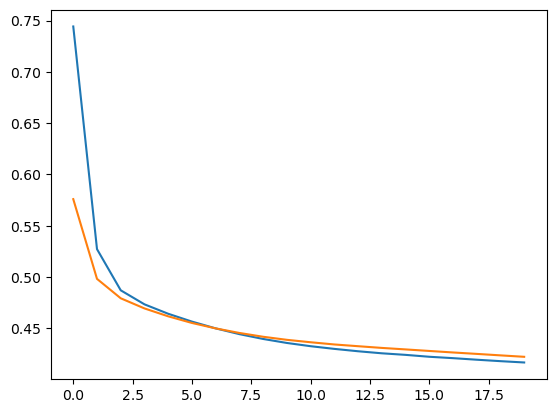

In [90]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

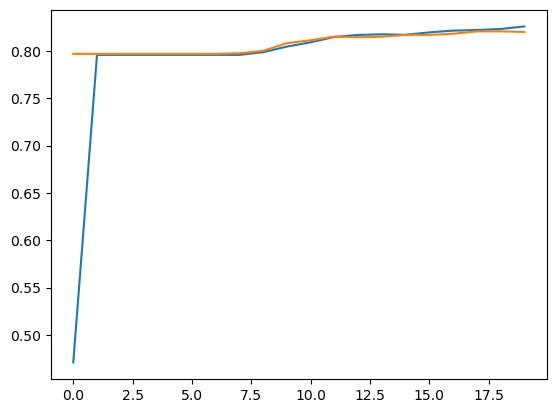

In [91]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [93]:
from collections import Counter

Counter(y_pred_classes)

Counter({np.int64(0): 1800, np.int64(1): 200})